# Combustion and Air Pollution HW #6

In this homework we will use more detailed combustion chemistry then we previously considered in this class, along with the Zeldovich mechanism for thermal fixation of atmospheric N2, to model and predict NOx formation in heptane combustion.
We use an open source software tool called [Cantera](http://www.cantera.org/docs/sphinx/html/index.html) which helps us solve thermodynamics and kinetics problems.

This homework was adapted from a lecture in Prof. Richard West's undergraduate chemical kinetics class in the Department of Chemical Engineering as well as existing Python notebooks in the [cantera-jupyter project](https://github.com/cantera/cantera-jupyter). 

#### Simply click inside the cells below to be able to type in and edit them, and press Shift+Enter to execute the code in a cell that is selected.

In [1]:
import cantera as ct
import numpy as np
import scipy

The n-heptane ($C_7H_{16}$) mechanism we will consider is from the Lawrence Livermore National Lab (LLNL), with the 3-reaction Zeldovich mechanism manually added to it. First we create a Solution object in Cantera for n-heptane gas that includes all of the thermodynamic and kinetic parameters needed to describe its combustion. (Don't worry about the warning)

In [46]:
gas = ct.Solution('heptanesymp159.cti')



**** WARNING ****
For species c7h15o-1, discontinuity in cp/R detected at Tmid = 1391
	Value computed using low-temperature polynomial:  53.0168.
	Value computed using high-temperature polynomial: 52.748.


We can print out some chemical species and reactions that are considered in the mechanism:

In [53]:
print " ".join(gas.species_names[:20])
for i in range(20):
    print gas.reaction(i)
print "There are {0} reactions in this mechanism!".format(len(gas.reactions()))

n2 ch3 h ch4 h2 oh h2o o c2h6 c2h5 hco co co2 o2 h2o2 ho2 c2h4 ch3oh ch2oh ch3o
ch3 + h (+M) => ch4 (+M)
ch4 (+M) => ch3 + h (+M)
ch4 + h => ch3 + h2
ch3 + h2 => ch4 + h
ch4 + oh => ch3 + h2o
ch3 + h2o => ch4 + oh
ch4 + o => ch3 + oh
ch3 + oh => ch4 + o
c2h6 + ch3 => c2h5 + ch4
c2h5 + ch4 => c2h6 + ch3
hco + oh => co + h2o
co + h2o => hco + oh
co + oh => co2 + h
co2 + h => co + oh
h + o2 => o + oh
o + oh => h + o2
h2 + o => h + oh
h + oh => h2 + o
h2o + o => 2 oh
2 oh => h2o + o
There are 1543 reactions in this mechanism!


Let's look at the last few reactions in the mechanism, representing the Zeldovich mechanism.

In [51]:
zeldovich = gas.reactions()[-3:]
for rxn in zeldovich:
    print rxn.equation, rxn.rate

n + no <=> n2 + o Arrhenius(A=2.7e+10, b=0, E=1.48532e+06)
n + o2 <=> no + o Arrhenius(A=9e+06, b=1, E=2.7196e+07)
n + oh <=> h + no Arrhenius(A=3.36e+10, b=0, E=1.61084e+06)


Just want to check at least one rate to make sure it's reasonably close to the one in the book...These came from the gri mech.

In [102]:
T = np.linspace(300,2500,100)

In [93]:
A = rxn.rate.pre_exponential_factor / 1000.0
n = rxn.rate.temperature_exponent
Ea = rxn.rate.activation_energy / 1000.0

In [103]:
rate_mech = A * T**n * np.exp(-Ea/8.314/T)
rate_book = 7.1E7 * np.exp(-450.0/T)

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

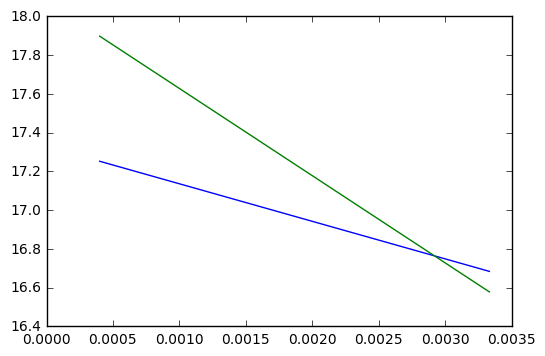

In [104]:
plt.plot(1.0/T, np.log(rate_mech))
plt.plot(1.0/T, np.log(rate_book))

We'll specify a starting temperature and pressure of 1000 K and 10 bar, and stoichiometric combustion
#### a. Specify the moles of O2 and N2 based on stoichiometric combustion.
Replace the "xxxx" with the correct number of moles.

In [118]:
gas.TPX = 1000, 10e5, 'nc7h16:1.0,o2:11.0,n2:41.58'
#gas.TPX = 1000, 10e5, 'nc7h16:1.0,o2:xxxx,n2:xxxx'

We'll find the equilibrium flame temperature by equilibrating keeping pressure and enthalpy constant.

In [117]:
gas.equilibrate('HP')
print "The adiabatic flame temperature is {0} K".format(int(round(gas.T)))
print "If you did part a properly, you should get a flame temperature of 2691 K."

The adiabatic flame temperature is 2691 K
If you did part a properly, you should get a flame temperature of 2691 K.
